# Mace Head - Final PM10 Algorithms Comparison (PM2.5 included)


# Import all the various packages

In [21]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FactorAnalysis
# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score, max_error

from time import process_time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

from sklearn.neural_network import MLPRegressor

In [22]:
df = pd.read_csv('C:\\Users\\User\\Final Year Project/MaceHead_FileforML.csv', thousands=',', low_memory=False)

In [23]:
# Change Date data type for later date selection
df['Date'] = df['Date'].astype('datetime64')

# Drop Irrelevant Columns

In [24]:
df.drop('indrain', axis=1, inplace=True)

In [25]:
df.drop('indtemp', axis=1, inplace=True)

In [26]:
df.drop('indwetb', axis=1, inplace=True)

In [27]:
df.drop('indwdsp', axis=1, inplace=True)

In [28]:
df.drop('indwddir', axis=1, inplace=True)

In [29]:
df.drop('wetb', axis=1, inplace=True)

In [30]:
df.drop('dewpt', axis=1, inplace=True)

In [31]:
df.drop('vappr', axis=1, inplace=True)

In [32]:
df.drop('rhum', axis=1, inplace=True)

In [33]:
print('Number of rows of data: {}'.format(len(df)))

Number of rows of data: 46948


# Remove all Rows with PM10 > 70 $\mu g / m^{3}$

In my data analysis work in previous notebooks, these values are suspiciously high and hence they are removed.

In [34]:
PMdf = df[(df['PM10'] < 70)]

print('The Number of rows deleted is: {} out of {} original rows'.format((len(df) - len(PMdf)), len(df)))

The Number of rows deleted is: 93 out of 46948 original rows


# Alter data to remove zero values for later input

In [35]:
PMdf['Ozone'] = PMdf['Ozone']+1.00
PMdf['rain'] = PMdf['rain']+1.00
PMdf['PM10'] = PMdf['PM10']+1.00
PMdf['wdsp'] = PMdf['wdsp']+1.00
PMdf['temp'] = PMdf['temp']+7.50
PMdf['Hour'] = PMdf['Hour']+1.00
PMdf['wddir'] = PMdf['wddir']/360 + 1.00
PMdf['msl'] = PMdf['msl']/1000

df['Ozone'] = df['Ozone']+1.00
df['rain'] = df['rain']+1.00
df['PM10'] = df['PM10']+1.00
df['wdsp'] = df['wdsp']+1.00
df['temp'] = df['temp']+7.50
df['Hour'] = df['Hour']+1.00
df['wddir'] = df['wddir']/360 + 1.00
df['msl'] = df['msl']/1000

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

# Select specific time periods

In [36]:

def Yeardf(Frame, Date1, Date2):
    import datetime
    Sorteddf = Frame[(Frame['Date'] > Date1) & (Frame['Date']< Date2)]
    return Sorteddf
Year2014PM = Yeardf(PMdf, "2014-03-01", "2015-01-01")
Year2015PM = Yeardf(PMdf, "2015-01-01", "2016-01-01")
Year2016PM = Yeardf(PMdf, "2016-01-01", "2017-01-01")
Year2017PM = Yeardf(PMdf, "2017-01-01", "2018-01-01")
Year2018PM = Yeardf(PMdf, "2018-01-01", "2019-01-01")
Year2019PM = Yeardf(PMdf, "2019-01-01", "2020-01-01")
Year2020PM = Yeardf(PMdf, "2020-01-01", "2021-01-01")
TotalYearsPM = Yeardf(PMdf, "2015-01-01", "2020-01-01")

Year2014 = Yeardf(df, "2014-03-01", "2015-01-01")
Year2015 = Yeardf(df, "2015-01-01", "2016-01-01")
Year2016 = Yeardf(df, "2016-01-01", "2017-01-01")
Year2017 = Yeardf(df, "2017-01-01", "2018-01-01")
Year2018 = Yeardf(df, "2018-01-01", "2019-01-01")
Year2019 = Yeardf(df, "2019-01-01", "2020-01-01")
Year2020 = Yeardf(df, "2020-01-01", "2021-01-01")
TotalYears = Yeardf(df, "2015-01-01", "2020-01-01")

In [37]:
print(len(TotalYears))
print(len(TotalYearsPM))


33914
33840


In [38]:
Year2014.drop('Date', axis=1, inplace=True)
Year2015.drop('Date', axis=1, inplace=True)
Year2016.drop('Date', axis=1, inplace=True)
Year2017.drop('Date', axis=1, inplace=True)
Year2018.drop('Date', axis=1, inplace=True)
Year2019.drop('Date', axis=1, inplace=True)
TotalYears.drop('Date', axis=1, inplace=True)

In [39]:
Year2014PM.drop('Date', axis=1, inplace=True)
Year2015PM.drop('Date', axis=1, inplace=True)
Year2016PM.drop('Date', axis=1, inplace=True)
Year2017PM.drop('Date', axis=1, inplace=True)
Year2018PM.drop('Date', axis=1, inplace=True)
Year2019PM.drop('Date', axis=1, inplace=True)
TotalYearsPM.drop('Date', axis=1, inplace=True)

In [40]:
#Check that it looks good
display(TotalYearsPM)

,Hour,rain,temp,msl,wdsp,wddir,Ozone,PM25,PM10
6070,2.0,1.0,18.1,1.0177,23.0,1.555556,89.80865,7.17,21.43
6071,3.0,1.0,18.1,1.0169,22.0,1.555556,89.74878,8.23,23.00
6072,4.0,1.1,18.0,1.0161,20.0,1.527778,89.46938,4.91,19.55
6073,5.0,1.8,17.9,1.0145,21.0,1.527778,89.38955,5.44,17.54
6074,6.0,2.9,17.7,1.0136,24.0,1.527778,88.77089,4.65,17.64
6075,7.0,3.6,17.8,1.0110,24.0,1.472222,88.49149,4.60,19.89
6076,8.0,3.4,18.4,1.0096,29.0,1.500000,87.35394,4.43,14.82
6077,9.0,1.5,18.8,1.0087,30.0,1.527778,86.21639,5.05,11.81
6078,10.0,1.1,18.8,1.0090,31.0,1.555556,84.69966,6.05,11.83
6079,11.0,1.0,18.9,1.0087,29.0,1.555556,83.58207,5.59,11.83


# Functions to be called during Machine Learning Algorithm operation

In [41]:
def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
    _meae = median_absolute_error(y_test, _predicted_values)
    _evs = explained_variance_score(y_test, _predicted_values)
    _me = max_error(y_test, _predicted_values)      
    return _mse, _mae, _r2, _meae, _evs, _me

In [42]:
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [43]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

# Random Forest
Function with preprocess built into it

In [68]:
%%time

def RandomForest(Name, N_Year, N, printCV, printgraph, N_Features, Max_Depth, ratio, PM):
    
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl', 'PM25']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                        ('regresson', RandomForestRegressor(n_estimators=100))])

    
    #print(len(Data))
    
    
    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]

    param_grid = [
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [FastICA( algorithm='deflation')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
    ]    

    search = GridSearchCV(pipe, param_grid, cv=10, iid = False, refit=True)
    search.fit(X_train, y_train)

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)
    
        
 
    # store the best params and best model for later use
    RF_best_params = search.best_params_
    RF_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = RandomForestRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure
    
    
    RF_mse, RF_mae, RF_r2, RF_meae, RF_evs, RF_me = evaluate_model(X_test, y_test, RF_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([RF_mse])
    MAE  = np.array([RF_mae])
    R2   = np.array([RF_r2])
    MEAE = np.array([RF_meae])
    ME   = np.array([RF_me])
    
    
    df = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df


Wall time: 0 ns


In [45]:
%%time
RandomForest('Random Forest', TotalYears, '2015-2019', 0, 0, 8, 0.3, 'Yes')

TypeError: RandomForest() missing 1 required positional argument: 'PM'

# Gradient Boosting
Function with preprocess built into it

In [69]:
%%time
def GradientBoosting(Name, N_Year, N, printCV, printgraph, N_Features, Max_Depth, ratio, PM):
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl', 'PM25']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                           ('reduce_dim', 'passthrough'),
                           ('regresson', GradientBoostingRegressor())])



    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        }


    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

    # store the best params and best model for later use
    GB_best_params = search.best_params_
    GB_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = GradientBoostingRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    GB_mse, GB_mae, GB_r2, GB_meae, GB_evs, GB_me = evaluate_model(X_test, y_test, GB_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([GB_mse])
    MAE  = np.array([GB_mae])
    R2   = np.array([GB_r2])
    MEAE = np.array([GB_meae])
    ME   = np.array([GB_me])
    
    
    df = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df
    

Wall time: 0 ns


In [47]:
%%time
GradientBoosting('Gradient Boosting', TotalYears, '2015-2019', 0, 0, 8, 0.3)

TypeError: GradientBoosting() missing 2 required positional arguments: 'ratio' and 'PM'

# ANN
Function with preprocess built into it

In [70]:
%%time
def ANN(Name, N_Year, N, printCV, printgraph, N_Features, ratio, PM):
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl', 'PM25']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', MLPRegressor ())])



    ALPHA = [0.001, 0.01, 0.1, 1, 10, 100], 
    HIDDEN_LAYER_SIZES = [(6),(11,11),(7,7,7)] 
    SOLVER = ['adam'] 
    ACTIVATION = ['relu','tanh','identity','logistic'] 
    LEARNING_RATE = ['constant','invscaling','adaptive']
    N_FEATURES_OPTIONS = [N_Features]
    MAX_ITER = [500]

    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },

    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    MLP_best_params = search.best_params_
    MLP_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = MLPRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    MLP_mse, MLP_mae, MLP_r2, MLP_meae, MLP_evs, MLP_me = evaluate_model(X_test, y_test, MLP_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([MLP_mse])
    MAE  = np.array([MLP_mae])
    R2   = np.array([MLP_r2])
    MEAE = np.array([MLP_meae])
    ME   = np.array([MLP_me])
    
    
    df = pd.DataFrame(list(zip(Title, Range, Features, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df
    

Wall time: 0 ns


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.328:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=8,
               noise_variance_init=None, random_state=0, svd_method='lapack',
               tol=0.01), 'reduce_dim__n_components': 8}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


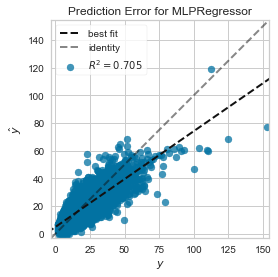

Wall time: 4min 49s


,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME
0,ANN,2015-2019,8,0.3,Yes,82.93169,6.433297,0.320393,4.952278,132.405164


In [49]:
%%time
ANN('ANN', TotalYears, '2015-2019', 0, 0, 8, 0.3, 'Yes')

# Linear Regression
Function with preprocess built into it

In [71]:
%%time
def LRegress(Name, N_Year, N, printCV, printgraph, N_Features, ratio, PM):
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl', 'PM25']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
    )
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])



    N_FEATURES_OPTIONS = [N_Features]
    NORMALIZE_OPTIONS = [False, True]

    param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [FastICA( algorithm='deflation')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    }
]

    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)


    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    LR_best_params = search.best_params_
    LR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = LinearRegression()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    LR_mse, LR_mae, LR_r2, LR_meae, LR_evs, LR_me = evaluate_model(X_test, y_test, LR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([LR_mse])
    MAE  = np.array([LR_mae])
    R2   = np.array([LR_r2])
    MEAE = np.array([LR_meae])
    ME   = np.array([LR_me])
    
    
    df = pd.DataFrame(list(zip(Title, Range, Features, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df

Wall time: 0 ns


In [51]:
%%time
LRegress('Linear Regression', TotalYears, '2015-2019', 0, 0, 8, 0.3)

TypeError: LRegress() missing 1 required positional argument: 'PM'

# SVM
Function with preprocess built into it

In [73]:
%%time
def SVM(Name, N_Year, N, printCV, printgraph, N_Features, ratio, PM):
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl', 'PM25']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', SVR())])



    KERNEL = ['linear']
    C = [300]
    GAMMA = ['auto']
    N_FEATURES_OPTIONS = [N_Features]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        }
    ]
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    SVR_best_params = search.best_params_
    SVR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = SVR()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    SVR_mse, SVR_mae, SVR_r2, SVR_meae, SVR_evs, SVR_me = evaluate_model(X_test, y_test, SVR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([SVR_mse])
    MAE  = np.array([SVR_mae])
    R2   = np.array([SVR_r2])
    MEAE = np.array([SVR_meae])
    ME   = np.array([SVR_me])
    
    
    df = pd.DataFrame(list(zip(Title, Range, Features, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df

Wall time: 0 ns


# Run Permutations of each Algorithm to Identify most optimised Algorithm

In [81]:
%%time
RF_6_12_NO = RandomForest('Random Forest', TotalYears, '2015-2019', 1, 1, 6, 12, 0.7, 'NO')

Wall time: 11min 58s


In [82]:
%%time
RF_7_12_NO = RandomForest('Random Forest', TotalYears, '2015-2019', 1, 1, 7, 12, 0.7, 'NO')

Wall time: 11min 38s


In [83]:
%%time
RF_8_12_NO = RandomForest('Random Forest', TotalYears, '2015-2019', 1, 1, 8, 12, 0.7, 'NO')

Wall time: 12min 27s


In [84]:
%%time
RF_8_12_NO_5 = RandomForest('Random Forest', TotalYears, '2015-2019', 1, 1, 8, 12, 0.5, 'NO')

Wall time: 25min 48s


In [85]:
%%time
RF_8_12_NO_3 = RandomForest('Random Forest', TotalYears, '2015-2019', 1, 1, 8, 12, 0.3, 'NO')

Wall time: 48min 22s


In [86]:
%%time
RF_8_12_YES_3 = RandomForest('Random Forest', TotalYearsPM, '2015-2019', 1, 1, 8, 12, 0.3, 'YES')

Wall time: 48min 1s


In [87]:
%%time
RF_8_14_YES_3 = RandomForest('Random Forest', TotalYearsPM, '2015-2019', 1, 1, 8, 14, 0.3, 'YES')

Wall time: 48min 33s


In [88]:
%%time
RF_8_16_YES_3 = RandomForest('Random Forest', TotalYearsPM, '2015-2019', 1, 1, 8, 16, 0.3, 'YES')

Wall time: 48min 50s


In [102]:
%%time
RF_8_18_YES_3 = RandomForest('Random Forest', TotalYearsPM, '2015-2019', 1, 1, 8, 18, 0.3, 'YES')

Wall time: 1h 38min 13s


In [103]:
%%time
RF_8_20_YES_3 = RandomForest('Random Forest', TotalYearsPM, '2015-2019', 1, 1, 8, 20, 0.3, 'YES')

Wall time: 1h 38min 10s


In [126]:
# Gather Algorithm statistics
RFTime = ['11m 58s', '11m 38s', '12m 27s', '25m 48s', '48m 22s',  '48m 1s', '48m 33s', '48m 50s', '1h 38m 13s', '1h 38m 10s']

RFData = pd.concat([RF_6_12_NO, RF_7_12_NO, RF_8_12_NO, RF_8_12_NO_5, RF_8_12_NO_3, RF_8_12_YES_3, RF_8_14_YES_3, RF_8_16_YES_3, RF_8_18_YES_3, RF_8_20_YES_3])
RFData['Run Time'] = RFTime
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(RFData)

,Algorithm,Year,N Features,Max Depth,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,Random Forest,2015-2019,6,12,0.7,NO,32.944,4.015,0.722,2.881,69.833,11m 58s
0,Random Forest,2015-2019,7,12,0.7,NO,33.314,4.042,0.722,3.047,102.497,11m 38s
0,Random Forest,2015-2019,8,12,0.7,NO,32.862,3.992,0.728,2.985,117.944,12m 27s
0,Random Forest,2015-2019,8,12,0.5,NO,30.801,3.854,0.741,2.821,101.729,25m 48s
0,Random Forest,2015-2019,8,12,0.3,NO,28.683,3.700,0.765,2.726,110.138,48m 22s
0,Random Forest,2015-2019,8,12,0.3,YES,25.539,3.662,0.766,2.728,40.337,48m 1s
0,Random Forest,2015-2019,8,14,0.3,YES,25.126,3.637,0.768,2.714,37.271,48m 33s
0,Random Forest,2015-2019,8,16,0.3,YES,24.740,3.597,0.770,2.663,35.827,48m 50s
0,Random Forest,2015-2019,8,18,0.3,YES,24.207,3.541,0.772,2.619,40.291,1h 38m 13s
0,Random Forest,2015-2019,8,20,0.3,YES,24.170,3.569,0.769,2.654,39.435,1h 38m 10s


In [104]:
%%time
GB_6_12_NO = GradientBoosting('Gradient Boosting', TotalYears, '2015-2019', 1, 1, 6, 12, 0.7, 'NO')

Wall time: 3min 38s


In [105]:
%%time
GB_7_12_NO = GradientBoosting('Gradient Boosting', TotalYears, '2015-2019', 1, 1, 7, 12, 0.7, 'NO')

Wall time: 3min 5s


In [106]:
%%time
GB_8_12_NO = GradientBoosting('Gradient Boosting', TotalYears, '2015-2019', 1, 1, 8, 12, 0.7, 'NO')

Wall time: 3min 8s


In [107]:
%%time
GB_8_12_NO_5 = GradientBoosting('Gradient Boosting', TotalYears, '2015-2019', 1, 1, 8, 12, 0.5, 'NO')

Wall time: 8min 57s


In [108]:
%%time
GB_8_12_NO_3 = GradientBoosting('Gradient Boosting', TotalYears, '2015-2019', 1, 1, 8, 12, 0.3, 'NO')

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Wall time: 17min 11s


In [109]:
%%time
GB_8_12_YES_3 = GradientBoosting('Gradient Boosting', TotalYearsPM, '2015-2019', 1, 1, 8, 12, 0.3, 'YES')

Wall time: 17min 15s


In [110]:
%%time
GB_8_14_YES_3 = GradientBoosting('Gradient Boosting', TotalYearsPM, '2015-2019', 1, 1, 8, 14, 0.3, 'YES')

Wall time: 21min 16s


In [111]:
%%time
GB_8_16_YES_3 = GradientBoosting('Gradient Boosting', TotalYearsPM, '2015-2019', 1, 1, 8, 16, 0.3, 'YES')

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Wall time: 28min 53s


In [112]:
%%time
GB_8_18_YES_3 = GradientBoosting('Gradient Boosting', TotalYearsPM, '2015-2019', 1, 1, 8, 18, 0.3, 'YES')

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Wall time: 41min 50s


In [113]:
%%time
GB_8_20_YES_3 = GradientBoosting('Gradient Boosting', TotalYearsPM, '2015-2019', 1, 1, 8, 20, 0.3, 'YES')

Wall time: 49min 1s


In [127]:
# Gather Algorithm statistics
GBTime = ['3m 38s', '3m 5s', '3m 8s', '8m 57s', '17m 11s', '17m 15s', '21m 16s', '28m 53s', '41m 50s', '49m 1s']

GBData = pd.concat([GB_6_12_NO, GB_7_12_NO, GB_8_12_NO, GB_8_12_NO_5, GB_8_12_NO_3, GB_8_12_YES_3, GB_8_14_YES_3, GB_8_16_YES_3, GB_8_18_YES_3, GB_8_20_YES_3])
GBData['Run Time'] = GBTime 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(GBData)

,Algorithm,Year,N Features,Max Depth,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,Gradient Boosting,2015-2019,6,12,0.7,NO,36.888,4.161,0.690,2.922,93.935,3m 38s
0,Gradient Boosting,2015-2019,7,12,0.7,NO,36.385,4.129,0.696,2.957,92.646,3m 5s
0,Gradient Boosting,2015-2019,8,12,0.7,NO,34.970,4.049,0.712,2.928,90.867,3m 8s
0,Gradient Boosting,2015-2019,8,12,0.5,NO,28.112,3.698,0.759,2.707,75.919,8m 57s
0,Gradient Boosting,2015-2019,8,12,0.3,NO,25.986,3.612,0.782,2.648,50.205,17m 11s
0,Gradient Boosting,2015-2019,8,12,0.3,YES,25.356,3.601,0.769,2.643,39.862,17m 15s
0,Gradient Boosting,2015-2019,8,14,0.3,YES,23.963,3.559,0.768,2.647,36.793,21m 16s
0,Gradient Boosting,2015-2019,8,16,0.3,YES,26.370,3.662,0.749,2.658,40.525,28m 53s
0,Gradient Boosting,2015-2019,8,18,0.3,YES,32.532,3.944,0.687,2.735,44.795,41m 50s
0,Gradient Boosting,2015-2019,8,20,0.3,YES,31.880,4.209,0.687,3.227,37.325,49m 1s


In [114]:
%%time
MLP_6_7 = ANN('ANN', TotalYears, '2015-2019', 1, 1, 6, 0.7, 'NO')

Wall time: 1min 12s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [115]:
%%time
MLP_7_7 = ANN('ANN', TotalYears, '2015-2019', 1, 1, 7, 0.7, 'NO')

Wall time: 1min 11s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [116]:
%%time
MLP_8_7 = ANN('ANN', TotalYears, '2015-2019', 1, 1, 8, 0.7, 'NO')

Wall time: 1min 13s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [117]:
%%time
MLP_8_5 = ANN('ANN', TotalYears, '2015-2019', 1, 1, 8, 0.5, 'NO')

Wall time: 2min 2s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [118]:
%%time
MLP_8_3 = ANN('ANN', TotalYears, '2015-2019', 1, 1, 8, 0.3, 'NO')

Wall time: 2min 56s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [119]:
%%time
MLP_8_3_YES = ANN('ANN', TotalYearsPM, '2015-2019', 1, 1, 8, 0.3, 'YES')

Wall time: 2min 55s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [128]:
# Gather Algorithm statistics
MLPTime = ['1m 12s', '1m 11s', '1m 13s', '2m 2s', '2m 56s', '2m 55s']

MLPData = pd.concat([MLP_6_7, MLP_7_7, MLP_8_7, MLP_8_5, MLP_8_3, MLP_8_3_YES])
MLPData['Run Time'] = MLPTime 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(MLPData)

,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,ANN,2015-2019,6,0.7,NO,40.708,4.529,0.652,3.365,96.488,1m 12s
0,ANN,2015-2019,7,0.7,NO,31.084,3.991,0.739,2.974,85.455,1m 11s
0,ANN,2015-2019,8,0.7,NO,31.286,3.956,0.740,2.955,90.318,1m 13s
0,ANN,2015-2019,8,0.5,NO,30.592,3.900,0.749,2.891,80.842,2m 2s
0,ANN,2015-2019,8,0.3,NO,29.117,3.820,0.748,2.825,83.062,2m 56s
0,ANN,2015-2019,8,0.3,YES,27.012,3.802,0.752,2.871,35.444,2m 55s


In [120]:
%%time
LR_6_7 = LRegress('Linear Regression', TotalYears, '2015-2019', 1, 1, 6, 0.7, 'NO')

Wall time: 4min 40s


In [121]:
%%time
LR_7_7 = LRegress('Linear Regression', TotalYears, '2015-2019', 1, 1, 7, 0.7, 'NO')

Wall time: 4min 2s


In [122]:
%%time
LR_8_7 = LRegress('Linear Regression', TotalYears, '2015-2019', 1, 1, 8, 0.7, 'NO')

Wall time: 4min 4s


In [123]:
%%time
LR_8_5 = LRegress('Linear Regression', TotalYears, '2015-2019', 1, 1, 8, 0.5, 'NO')

Wall time: 11min 42s


In [124]:
%%time
LR_8_3 = LRegress('Linear Regression', TotalYears, '2015-2019', 1, 1, 8, 0.3, 'NO')

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Wall time: 24min 18s


In [125]:
%%time
LP_8_3_YES = LRegress('Linear Regression', TotalYearsPM, '2015-2019', 1, 1, 8, 0.3, 'YES')

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Wall time: 24min 34s


In [129]:
# Gather Algorithm statistics
LRTime = ['4m 40s', '4m 2s', '4m 4s', '11m 42s', '24m 18s', '24m 34s']

LRData = pd.concat([LR_6_7, LR_7_7, LR_8_7, LR_8_5, LR_8_3, LP_8_3_YES])
LRData['Run Time'] = LRTime 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(LRData)

,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,Linear Regression,2015-2019,6,0.7,NO,52.470,5.264,0.551,4.233,121.996,4m 40s
0,Linear Regression,2015-2019,7,0.7,NO,54.418,5.251,0.546,4.189,122.548,4m 2s
0,Linear Regression,2015-2019,8,0.7,NO,53.413,5.268,0.551,4.211,115.834,4m 4s
0,Linear Regression,2015-2019,8,0.5,NO,54.687,5.252,0.549,4.144,122.508,11m 42s
0,Linear Regression,2015-2019,8,0.3,NO,55.107,5.245,0.546,4.156,115.782,24m 18s
0,Linear Regression,2015-2019,8,0.3,YES,45.371,5.090,0.573,4.094,42.098,24m 34s


In [74]:
%%time
SVM_6_7 = SVM('SVM', TotalYears, '2015-2019', 1, 1, 6, 0.7, 'NO')

Wall time: 1min 22s


In [75]:
%%time
SVM_7_7 = SVM('SVM', TotalYears, '2015-2019', 1, 1, 7, 0.7, 'NO')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 1min 13s


In [76]:
%%time
SVM_8_7 = SVM('SVM', TotalYears, '2015-2019', 1, 1, 8, 0.7, 'NO')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 1min 17s


In [77]:
%%time
SVM_8_5 = SVM('SVM', TotalYears, '2015-2019', 1, 1, 8, 0.5, 'NO')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 4min 1s


In [78]:
%%time
SVM_8_3 = SVM('SVM', TotalYears, '2015-2019', 1, 1, 8, 0.3, 'NO')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 7min 15s


In [79]:
%%time
SVM_8_3_YES = SVM('SVM', TotalYearsPM, '2015-2019', 1, 1, 8, 0.3, 'YES')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 7min 13s


In [130]:
# Gather Algorithm statistics
SVMTime = ['1m 22s', '1m 13s', '1m 17s', '4m 1s', '7m 15s', '7m 13s']

SVMData = pd.concat([SVM_6_7, SVM_7_7, SVM_8_7, SVM_8_5, SVM_8_3, SVM_8_3_YES])
SVMData['Run Time'] = SVMTime 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(SVMData)

,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,SVM,2015-2019,6,0.7,NO,44.601,4.580,0.620,3.309,115.233,1m 22s
0,SVM,2015-2019,7,0.7,NO,38.340,4.041,0.680,2.854,121.837,1m 13s
0,SVM,2015-2019,8,0.7,NO,38.287,4.043,0.683,2.834,120.732,1m 17s
0,SVM,2015-2019,8,0.5,NO,36.750,3.964,0.700,2.761,115.940,4m 1s
0,SVM,2015-2019,8,0.3,NO,36.954,3.912,0.704,2.711,114.815,7m 15s
0,SVM,2015-2019,8,0.3,YES,27.820,3.738,0.738,2.686,40.637,7m 13s


# Display Tables of Statistics

In [132]:
# Check that they all look reasonable
display(RFData)
display(GBData)
display(MLPData)
display(LRData)
display(SVMData)

,Algorithm,Year,N Features,Max Depth,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,Random Forest,2015-2019,6,12,0.7,NO,32.944,4.015,0.722,2.881,69.833,11m 58s
0,Random Forest,2015-2019,7,12,0.7,NO,33.314,4.042,0.722,3.047,102.497,11m 38s
0,Random Forest,2015-2019,8,12,0.7,NO,32.862,3.992,0.728,2.985,117.944,12m 27s
0,Random Forest,2015-2019,8,12,0.5,NO,30.801,3.854,0.741,2.821,101.729,25m 48s
0,Random Forest,2015-2019,8,12,0.3,NO,28.683,3.700,0.765,2.726,110.138,48m 22s
0,Random Forest,2015-2019,8,12,0.3,YES,25.539,3.662,0.766,2.728,40.337,48m 1s
0,Random Forest,2015-2019,8,14,0.3,YES,25.126,3.637,0.768,2.714,37.271,48m 33s
0,Random Forest,2015-2019,8,16,0.3,YES,24.740,3.597,0.770,2.663,35.827,48m 50s
0,Random Forest,2015-2019,8,18,0.3,YES,24.207,3.541,0.772,2.619,40.291,1h 38m 13s
0,Random Forest,2015-2019,8,20,0.3,YES,24.170,3.569,0.769,2.654,39.435,1h 38m 10s


,Algorithm,Year,N Features,Max Depth,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,Gradient Boosting,2015-2019,6,12,0.7,NO,36.888,4.161,0.690,2.922,93.935,3m 38s
0,Gradient Boosting,2015-2019,7,12,0.7,NO,36.385,4.129,0.696,2.957,92.646,3m 5s
0,Gradient Boosting,2015-2019,8,12,0.7,NO,34.970,4.049,0.712,2.928,90.867,3m 8s
0,Gradient Boosting,2015-2019,8,12,0.5,NO,28.112,3.698,0.759,2.707,75.919,8m 57s
0,Gradient Boosting,2015-2019,8,12,0.3,NO,25.986,3.612,0.782,2.648,50.205,17m 11s
0,Gradient Boosting,2015-2019,8,12,0.3,YES,25.356,3.601,0.769,2.643,39.862,17m 15s
0,Gradient Boosting,2015-2019,8,14,0.3,YES,23.963,3.559,0.768,2.647,36.793,21m 16s
0,Gradient Boosting,2015-2019,8,16,0.3,YES,26.370,3.662,0.749,2.658,40.525,28m 53s
0,Gradient Boosting,2015-2019,8,18,0.3,YES,32.532,3.944,0.687,2.735,44.795,41m 50s
0,Gradient Boosting,2015-2019,8,20,0.3,YES,31.880,4.209,0.687,3.227,37.325,49m 1s


,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,ANN,2015-2019,6,0.7,NO,40.708,4.529,0.652,3.365,96.488,1m 12s
0,ANN,2015-2019,7,0.7,NO,31.084,3.991,0.739,2.974,85.455,1m 11s
0,ANN,2015-2019,8,0.7,NO,31.286,3.956,0.740,2.955,90.318,1m 13s
0,ANN,2015-2019,8,0.5,NO,30.592,3.900,0.749,2.891,80.842,2m 2s
0,ANN,2015-2019,8,0.3,NO,29.117,3.820,0.748,2.825,83.062,2m 56s
0,ANN,2015-2019,8,0.3,YES,27.012,3.802,0.752,2.871,35.444,2m 55s


,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,Linear Regression,2015-2019,6,0.7,NO,52.470,5.264,0.551,4.233,121.996,4m 40s
0,Linear Regression,2015-2019,7,0.7,NO,54.418,5.251,0.546,4.189,122.548,4m 2s
0,Linear Regression,2015-2019,8,0.7,NO,53.413,5.268,0.551,4.211,115.834,4m 4s
0,Linear Regression,2015-2019,8,0.5,NO,54.687,5.252,0.549,4.144,122.508,11m 42s
0,Linear Regression,2015-2019,8,0.3,NO,55.107,5.245,0.546,4.156,115.782,24m 18s
0,Linear Regression,2015-2019,8,0.3,YES,45.371,5.090,0.573,4.094,42.098,24m 34s


,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,SVM,2015-2019,6,0.7,NO,44.601,4.580,0.620,3.309,115.233,1m 22s
0,SVM,2015-2019,7,0.7,NO,38.340,4.041,0.680,2.854,121.837,1m 13s
0,SVM,2015-2019,8,0.7,NO,38.287,4.043,0.683,2.834,120.732,1m 17s
0,SVM,2015-2019,8,0.5,NO,36.750,3.964,0.700,2.761,115.940,4m 1s
0,SVM,2015-2019,8,0.3,NO,36.954,3.912,0.704,2.711,114.815,7m 15s
0,SVM,2015-2019,8,0.3,YES,27.820,3.738,0.738,2.686,40.637,7m 13s


In [133]:
PM25incData = pd.concat([RFData, GBData, MLPData, LRData, SVMData])
display(PM25incData)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,Random Forest,4.015,69.833,2.881,32.944,12.0,6,NO,0.722,11m 58s,0.7,2015-2019
0,Random Forest,4.042,102.497,3.047,33.314,12.0,7,NO,0.722,11m 38s,0.7,2015-2019
0,Random Forest,3.992,117.944,2.985,32.862,12.0,8,NO,0.728,12m 27s,0.7,2015-2019
0,Random Forest,3.854,101.729,2.821,30.801,12.0,8,NO,0.741,25m 48s,0.5,2015-2019
0,Random Forest,3.700,110.138,2.726,28.683,12.0,8,NO,0.765,48m 22s,0.3,2015-2019
0,Random Forest,3.662,40.337,2.728,25.539,12.0,8,YES,0.766,48m 1s,0.3,2015-2019
0,Random Forest,3.637,37.271,2.714,25.126,14.0,8,YES,0.768,48m 33s,0.3,2015-2019
0,Random Forest,3.597,35.827,2.663,24.740,16.0,8,YES,0.770,48m 50s,0.3,2015-2019
0,Random Forest,3.541,40.291,2.619,24.207,18.0,8,YES,0.772,1h 38m 13s,0.3,2015-2019
0,Random Forest,3.569,39.435,2.654,24.170,20.0,8,YES,0.769,1h 38m 10s,0.3,2015-2019


In [134]:
# Create CSV of results
PM25incData.to_csv('PM10_Prediction_Results_including_PM25', index=False)